In [18]:
import pickle
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from utils import denormalize, bounding_box, load_inputs

import json

In [19]:
def denormalize(T, coords):
    return 0.5 * ((coords + 1.0) * T)

In [20]:
g = open("./sample4.json")
glimpses = json.load(g)
g.close()

In [21]:
# glimpses.keys()

In [22]:
# im_name = '../../pooling/data/MEX/484014116/pngs/484014116_2010_1_box484014116_MAY.png'
# coords = glimpses[im_name]

In [75]:
# from matplotlib.patches import Rectangle
# import torchvision
# import torch


# def plot(image_name, coords):
    
#     muni_id = image_name.split("/")[5]
#     image = torchvision.transforms.functional.adjust_brightness(load_inputs(image_name), brightness_factor = 2)    
    
#     first = True
#     for glimpseID, coords in coords.items():
        
#         print(glimpseID)
        
#         if "_scale0" in glimpseID:
        
#             from_x, to_x, from_y, to_y = int(coords["from_x"]), int(coords["to_x"]), int(coords["from_y"]), int(coords["to_y"])
            
#             print(image.shape)
#             print(from_x, to_x, from_y, to_y)
            
#             if first:
#                 all_coords = torch.tensor([[from_x, from_y]])
#                 cur_patch = image[:, :, from_x:to_x, from_y:to_y]
#                 size = cur_patch.shape[2] - 1
#                 print("SIZE: ", size)
#             else:
#                 all_coords = torch.cat((all_coords, torch.tensor([[from_x, from_y]])), dim = 0)
#             first = False
        
#     coords = all_coords.numpy()
#     print(coords)
#     num_anims = len(coords)
#     num_cols = 1
    
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1)
#     plt.imshow(image[0].permute(1,2,0), cmap="Greys_r")

#     def updateData(i):
#         color = "r"
#         c = coords[i]
#         for p in ax.patches:
#             p.remove()
            
#         print((c[0], c[1]))
#         rect = Rectangle((c[1], c[0]),
#                         size, size, color = color)
#         ax.add_patch(rect)  
        

        
# #         ax.add_patch(rect)  
     
#     # animate
#     anim = animation.FuncAnimation(
#         fig, updateData, frames = num_anims, interval=500, repeat=True
#     )   
    
#     # save as mp4
#     name = f"./animations/{muni_id}.mp4"
#     anim.save(name, extra_args=["-vcodec", "h264", "-pix_fmt", "yuv420p"])        

In [78]:
import torchvision
import torch

def plot(image_name, coords):
    
    muni_id = image_name.split("/")[5]
    image = torchvision.transforms.functional.adjust_brightness(load_inputs(image_name), brightness_factor = 2)    
    
    first = True
    for glimpseID, coords in coords.items():
        
#         print(glimpseID)
        
        if "_scale0" in glimpseID:
        
            from_x, to_x, from_y, to_y = int(coords["from_x"]), int(coords["to_x"]), int(coords["from_y"]), int(coords["to_y"])
            
#             print(image.shape)
#             print(from_x, to_x, from_y, to_y)
            
            if first:
                all_coords = torch.tensor([[from_x, from_y]])
                cur_patch = image[:, :, from_x:to_x, from_y:to_y]
                size = cur_patch.shape[2]
#                 print("SIZE: ", size)
            else:
                all_coords = torch.cat((all_coords, torch.tensor([[from_x, from_y]])), dim = 0)
            first = False
        
    coords = all_coords.numpy()
#     print(coords)
    num_anims = len(coords)
    num_cols = 1
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.imshow(image[0].permute(1,2,0), cmap="Greys_r")

    def updateData(i):
        color = "r"
        c = coords[i]
#         print("C: ", c)
        for p in ax.patches:
            p.remove()
        rect = bounding_box(c[1], c[0], size, color)
        ax.add_patch(rect)  
     
    # animate
    anim = animation.FuncAnimation(
        fig, updateData, frames = num_anims, interval = 500, repeat = True
    )   
    
    # save as mp4
    name = f"./animations/{muni_id}.mp4"
    anim.save(name, extra_args=["-vcodec", "h264", "-pix_fmt", "yuv420p"])  
    
    plt.clf()

In [79]:
435 + 114 - 1

548

../../attn/data/MEX/484001008/pngs/484001008_2010_all_box484001008_MAY.png
../../attn/data/MEX/484004004/pngs/484004004_2010_all_box484004004_MAY.png
../../attn/data/MEX/484004001/pngs/484004001_2010_all_box484004001_MAY.png
../../attn/data/MEX/484005010/pngs/484005010_2010_all_box484005010_MAY.png
../../attn/data/MEX/484001005/pngs/484001005_2010_all_box484001005_MAY.png
../../attn/data/MEX/484001007/pngs/484001007_2010_all_box484001007_MAY.png
../../attn/data/MEX/484001006/pngs/484001006_2010_all_box484001006_MAY.png
../../attn/data/MEX/484001001/pngs/484001001_2010_all_box484001001_MAY.png
../../attn/data/MEX/484004005/pngs/484004005_2010_all_box484004005_MAY.png
../../attn/data/MEX/484005001/pngs/484005001_2010_all_box484005001_MAY.png
../../attn/data/MEX/484005004/pngs/484005004_2010_all_box484005004_MAY.png
../../attn/data/MEX/484005008/pngs/484005008_2010_all_box484005008_MAY.png
../../attn/data/MEX/484001002/pngs/484001002_2010_all_box484001002_MAY.png
../../attn/data/MEX/48400

/opt/conda/envs/rapids/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


../../attn/data/MEX/484005015/pngs/484005015_2010_all_box484005015_MAY.png
../../attn/data/MEX/484005014/pngs/484005014_2010_all_box484005014_MAY.png
../../attn/data/MEX/484005017/pngs/484005017_2010_all_box484005017_MAY.png
../../attn/data/MEX/484005021/pngs/484005021_2010_all_box484005021_MAY.png


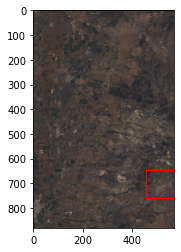

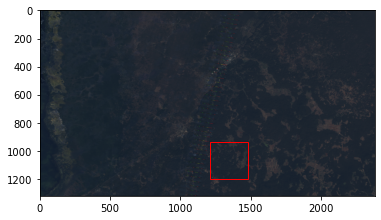

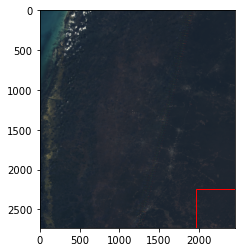

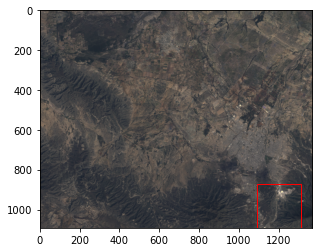

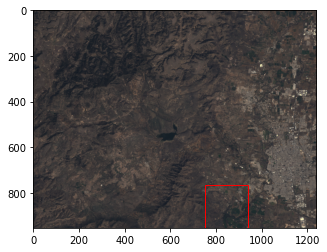

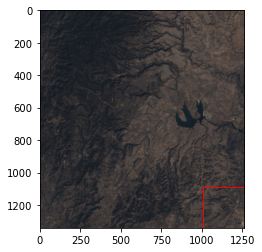

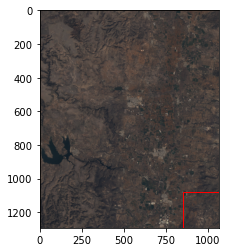

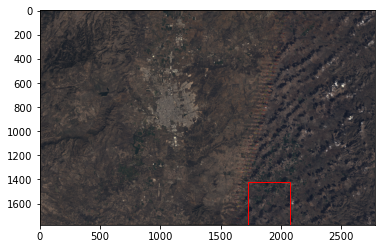

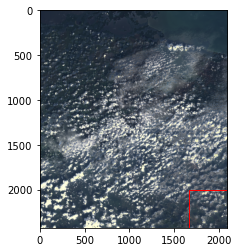

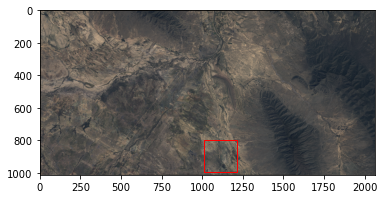

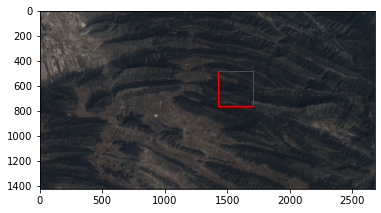

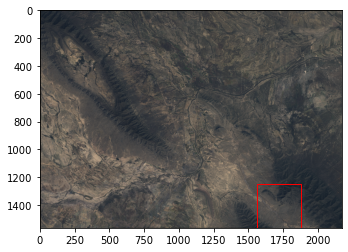

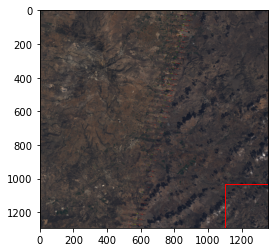

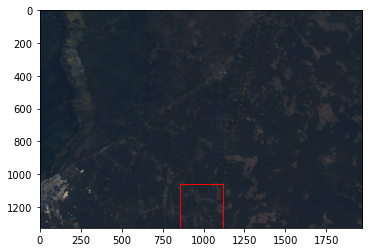

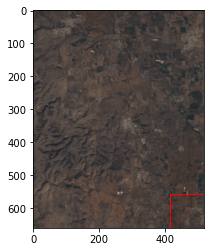

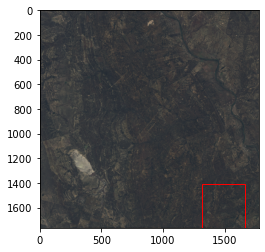

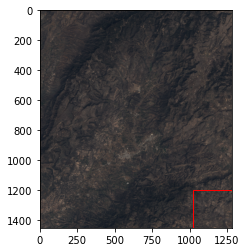

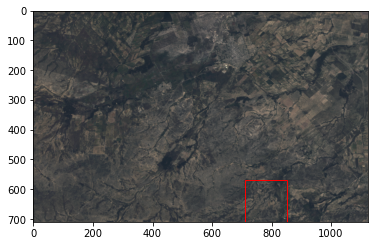

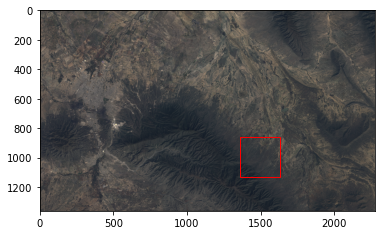

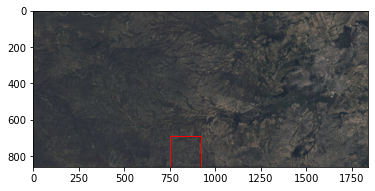

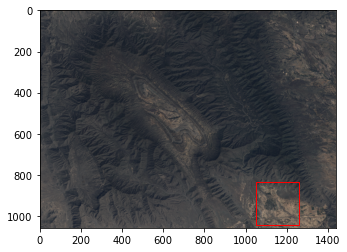

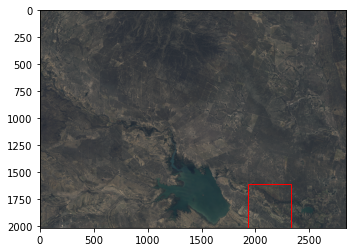

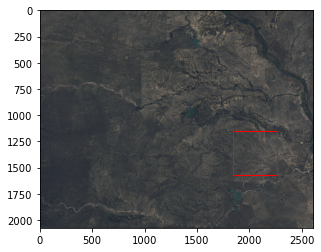

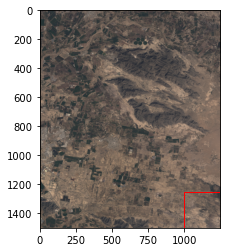

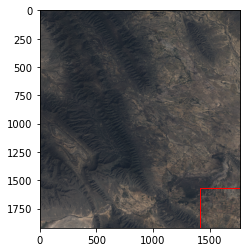

In [80]:
# i = 0
for k,v in glimpses.items():
    print(k)
    plot(k, v)
#     i += 1
#     if i >= 1:
#         break

torch.Size([1, 3, 881, 570])


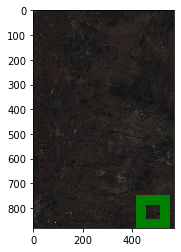

In [67]:
# The image
X = np.arange(16).reshape(4, 4)
  
X = load_inputs("../../attn/data/MEX/484001008/pngs/484001008_2010_all_box484001008_MAY.png")
 
print(X.shape)
    
    
# highlight some feature in the
# middle boxes.
fig = plt.figure()
  
ax = fig.add_subplot(111)
ax.imshow(X[0].permute(1,2,0), cmap = plt.cm.gray,
          interpolation ='nearest')
ax.add_patch( Rectangle((435, 767),
                        100, 100,
                        color = 'red',
                        fc ='none', 
                        ec ='g',
                        lw = 10) )